**Outlier**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DIU/Fall-23/AI Lab/ML/Data/placement.csv')

In [ ]:
df.shape

(1000, 3)

In [ ]:
df.sample(5)

,cgpa,placement_exam_marks,placed
476,6.83,34.0,0
265,6.94,57.0,0
141,7.19,18.0,0
411,6.04,66.0,0
976,6.96,48.0,0


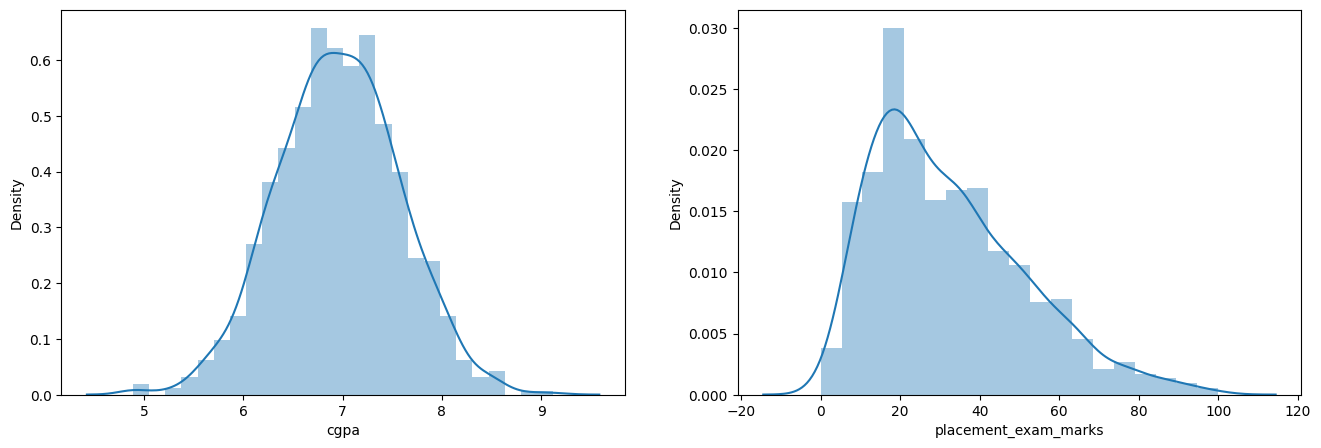

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [ ]:
upper_limit= df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit= df['cgpa'].mean() - 3*df['cgpa'].std()

print('upper_limit: ',upper_limit)
print('lower_limit: ',lower_limit)

upper_limit:  8.808933625397168
lower_limit:  5.113546374602832


In [ ]:
outlier = df[(df['cgpa'] > upper_limit) | (df['cgpa'] < lower_limit)]
outlier

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
#Trimming
new_df1 = df[(df['cgpa'] < upper_limit) & (df['cgpa'] > lower_limit)]
new_df1.shape

(995, 3)

<Axes: >

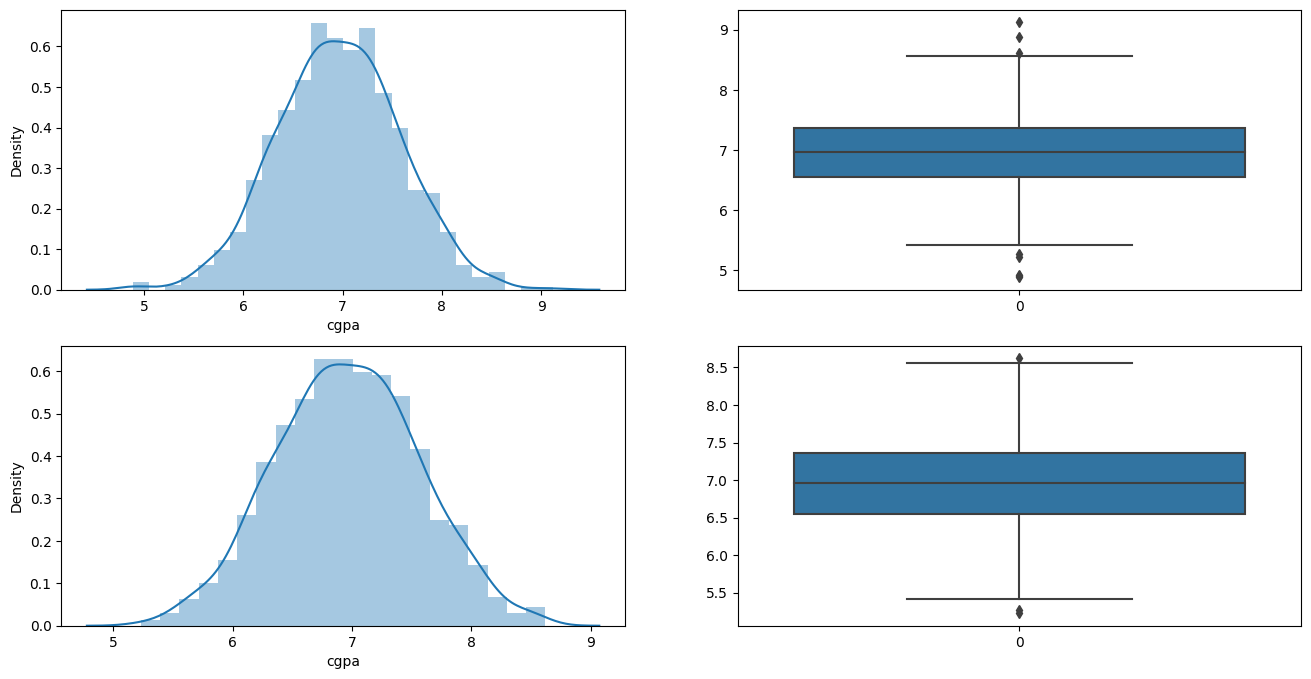

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(new_df1['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(new_df1['cgpa'])


In [ ]:
#capping
df2=df.copy()
df2['cgpa'] = np.where(
    df2['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df2['cgpa']<lower_limit,
        lower_limit,
        df2['cgpa']
    )
)



In [ ]:
df2.shape

(1000, 3)

<Axes: >

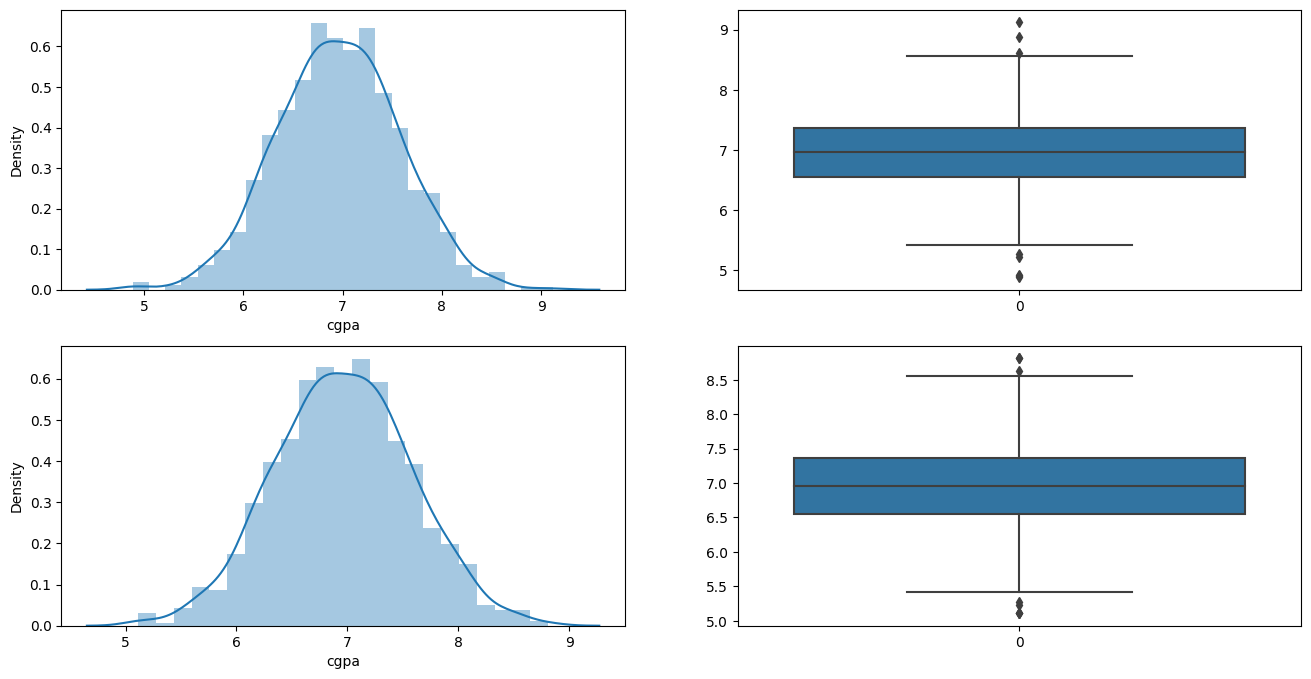

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(df2['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(df2['cgpa'])

**Feature Selection**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DIU/Fall-23/AI Lab/ML/Data/train.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [ ]:
#Univariate Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif

test = SelectKBest(score_func= f_classif)
test.fit(X,y)
scores= pd.DataFrame(test.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,battery_power,31.598158
1,blue,0.476768
2,clock_speed,0.493708
3,dual_sim,0.428239
4,fc,0.772182
5,four_g,1.059525
6,int_memory,2.922996
7,m_dep,1.500682
8,mobile_wt,3.594318
9,n_cores,2.625415


In [ ]:
print(featureScores.nlargest(10,'Score'))

            Specs        Score
13            ram  3520.110824
0   battery_power    31.598158
12       px_width    22.620882
11      px_height    19.484842
8       mobile_wt     3.594318
6      int_memory     2.922996
9         n_cores     2.625415
14           sc_h     2.225984
15           sc_w     1.671000
16      talk_time     1.628811


In [ ]:
#Feature importances
from sklearn.ensemble import ExtraTreesClassifier

test = ExtraTreesClassifier()
test.fit(X,y)
scores = pd.DataFrame(test.feature_importances_)
columns = pd.DataFrame(X.columns)

feat_importances = pd.concat([columns,scores],axis=1)
feat_importances.columns = ['Specs','Importance']
feat_importances


,Specs,Importance
0,battery_power,0.062043
1,blue,0.019952
2,clock_speed,0.033152
3,dual_sim,0.018188
4,fc,0.033621
5,four_g,0.017624
6,int_memory,0.035486
7,m_dep,0.033891
8,mobile_wt,0.036539
9,n_cores,0.033508


In [ ]:
print(feat_importances.nlargest(10,'Importance'))

            Specs  Importance
13            ram    0.391389
0   battery_power    0.062043
12       px_width    0.048759
11      px_height    0.046065
8       mobile_wt    0.036539
6      int_memory    0.035486
16      talk_time    0.035411
15           sc_w    0.034562
7           m_dep    0.033891
10             pc    0.033779


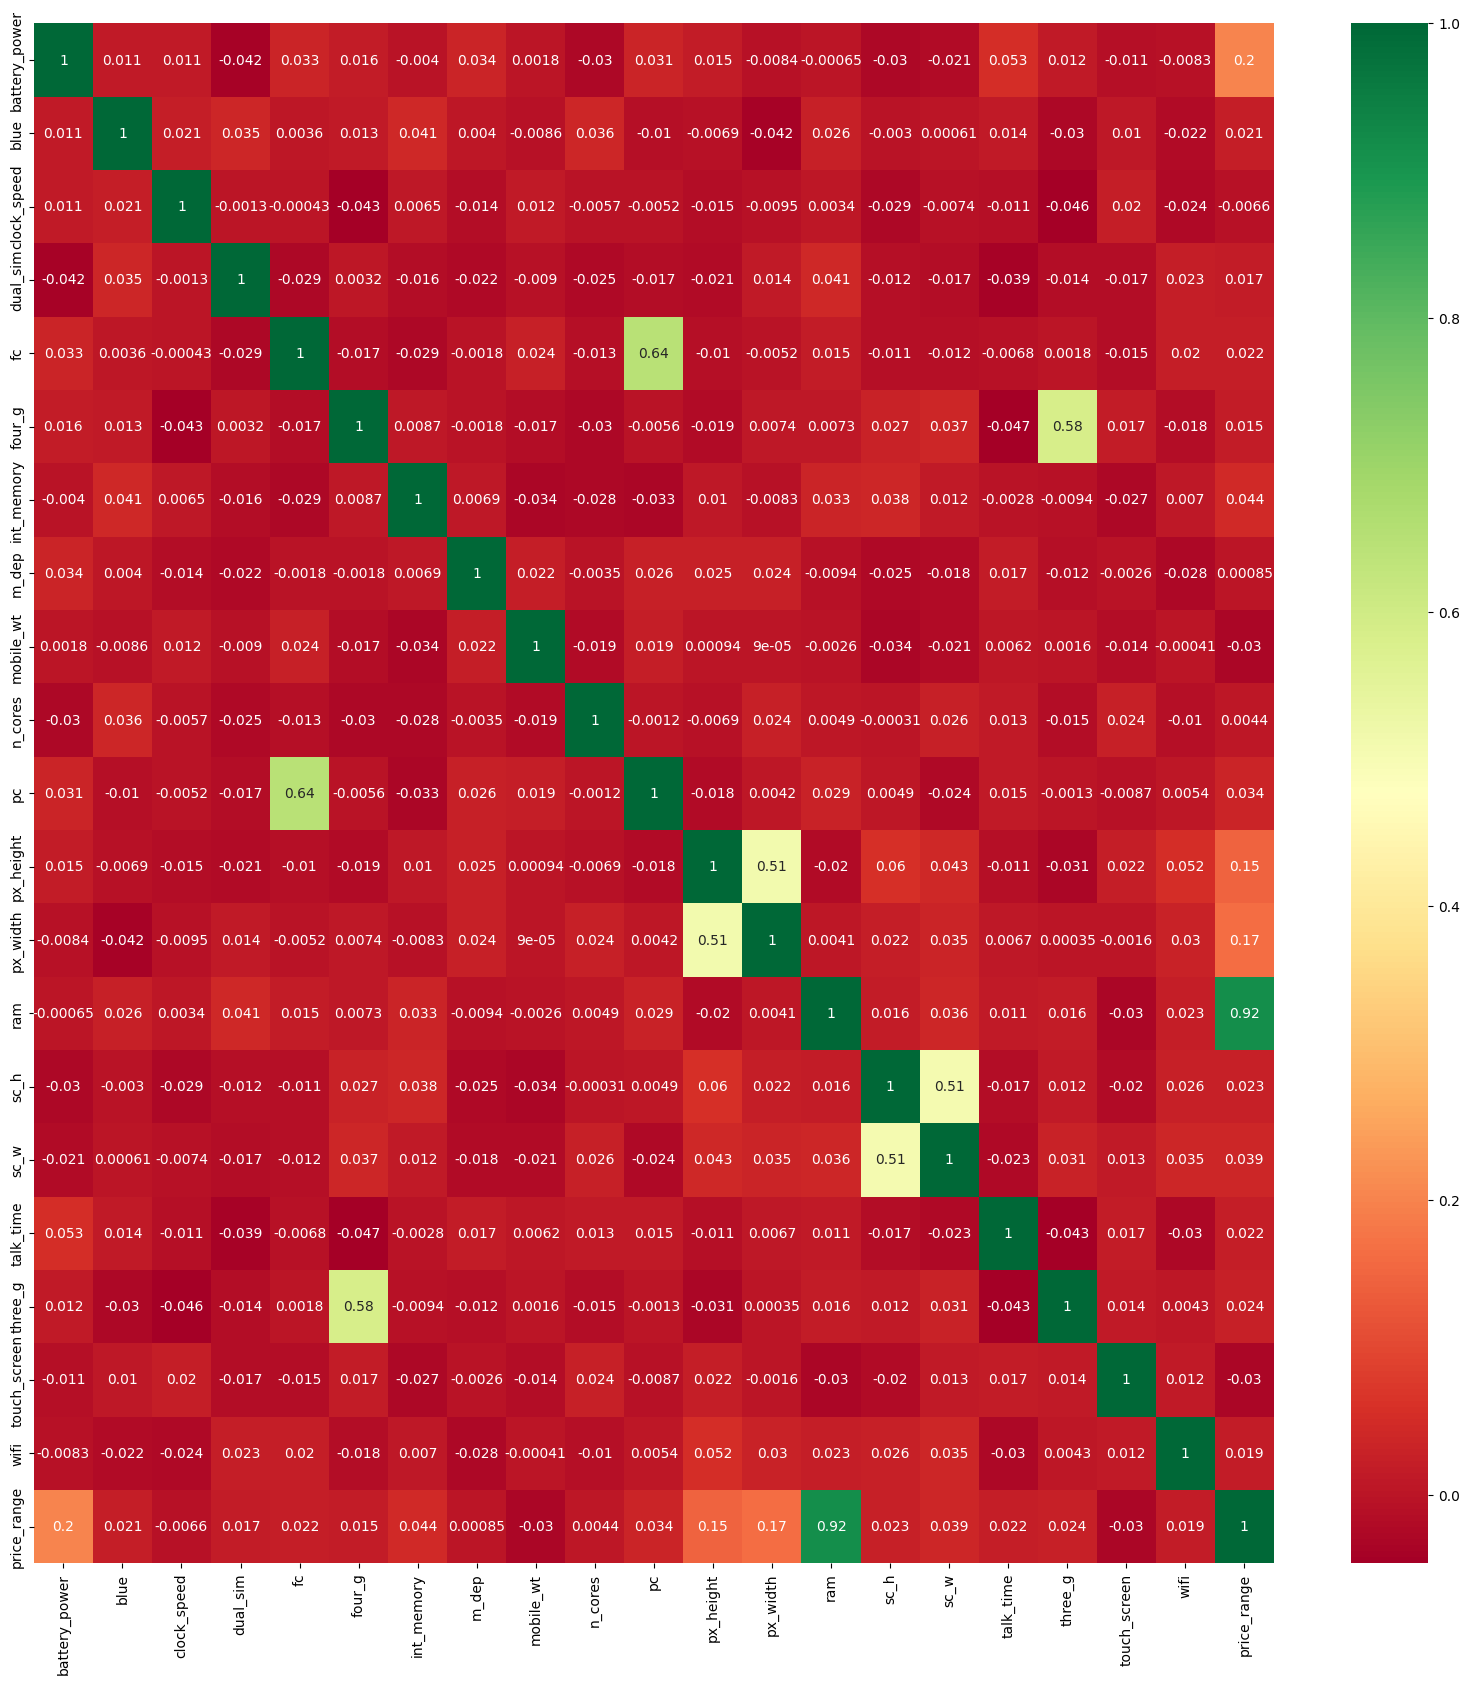

In [ ]:
#Correlation Matrix with Heatmap

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df.corr()['price_range'].nlargest(11)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
Name: price_range, dtype: float64

In [ ]:
#PCA

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])
X_pca

,PC1,PC2
0,-0.492970,0.032567
1,-0.359348,0.786469
2,-0.377281,0.952322
3,-0.274140,-1.517548
4,-0.871738,-0.254307
...,...,...
995,-1.757085,2.627968
996,-1.267669,3.691717
997,2.444802,-2.313522
998,-1.395959,2.414762
